In [40]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from category_encoders.backward_difference import BackwardDifferenceEncoder

from yellowbrick.classifier import ROCAUC

pd.options.display.max_columns = 100

%matplotlib inline

In [41]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
# Do not re-run this. It takes super long..
# report = train.profile_report()
# report.to_file('train-data-profile.html')

# Feature engineering and model training

In [5]:
# Convert bin_3 and bin_4 into integer
train['bin_3'] = train['bin_3'].replace({"T":1, "F":0})
train['bin_4'] = train['bin_4'].replace({"Y":1, "N":0})

In [6]:
# Cyclical encode day and month
train['day_sin'] = np.sin(2*np.pi*(train['day'] / 7))
train['day_cos'] = np.cos(2*np.pi*(train['day'] / 7))

train['month_sin'] = np.sin(2*np.pi*(train['month'] / 12))
train['month_cos'] = np.cos(2*np.pi*(train['month'] / 12))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


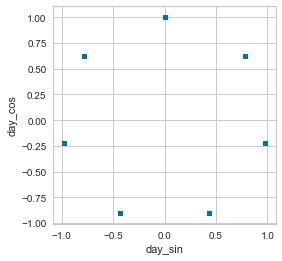

In [7]:
train.plot.scatter('day_sin', 'day_cos').set_aspect('equal')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


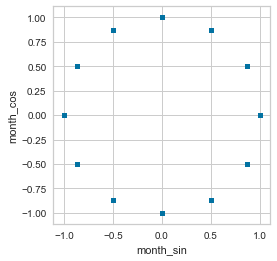

In [8]:
train.plot.scatter('month_sin', 'month_cos').set_aspect('equal')

In [9]:
# for nom 5, 6, 7, 8, 9 replace each category with its occurance, average target and variance in target
nom_5_count = train['nom_5'].value_counts().reset_index().rename({'index': 'nom_5', 'nom_5': 'nom_5_count'}, axis=1)
nom_5_ave = train[['nom_5', 'target']].groupby('nom_5').mean().reset_index().rename({'target': 'nom_5_ave'}, axis=1)
nom_5_std = train[['nom_5', 'target']].groupby('nom_5').std().reset_index().rename({'target': 'nom_5_std'}, axis=1)
nom_5_df = nom_5_count.merge(nom_5_ave).merge(nom_5_std)

nom_6_count = train['nom_6'].value_counts().reset_index().rename({'index': 'nom_6', 'nom_6': 'nom_6_count'}, axis=1)
nom_6_ave = train[['nom_6', 'target']].groupby('nom_6').mean().reset_index().rename({'target': 'nom_6_ave'}, axis=1)
nom_6_std = train[['nom_6', 'target']].groupby('nom_6').std().reset_index().rename({'target': 'nom_6_std'}, axis=1)
nom_6_df = nom_6_count.merge(nom_6_ave).merge(nom_6_std)

nom_7_count = train['nom_7'].value_counts().reset_index().rename({'index': 'nom_7', 'nom_7': 'nom_7_count'}, axis=1)
nom_7_ave = train[['nom_7', 'target']].groupby('nom_7').mean().reset_index().rename({'target': 'nom_7_ave'}, axis=1)
nom_7_std = train[['nom_7', 'target']].groupby('nom_7').std().reset_index().rename({'target': 'nom_7_std'}, axis=1)
nom_7_df = nom_7_count.merge(nom_7_ave).merge(nom_7_std)

nom_8_count = train['nom_8'].value_counts().reset_index().rename({'index': 'nom_8', 'nom_8': 'nom_8_count'}, axis=1)
nom_8_ave = train[['nom_8', 'target']].groupby('nom_8').mean().reset_index().rename({'target': 'nom_8_ave'}, axis=1)
nom_8_std = train[['nom_8', 'target']].groupby('nom_8').std().reset_index().rename({'target': 'nom_8_std'}, axis=1)
nom_8_df = nom_8_count.merge(nom_8_ave).merge(nom_8_std)

nom_9_count = train['nom_9'].value_counts().reset_index().rename({'index': 'nom_9', 'nom_9': 'nom_9_count'}, axis=1)
nom_9_ave = train[['nom_9', 'target']].groupby('nom_9').mean().reset_index().rename({'target': 'nom_9_ave'}, axis=1)
nom_9_std = train[['nom_9', 'target']].groupby('nom_9').std().reset_index().rename({'target': 'nom_9_std'}, axis=1)
nom_9_df = nom_9_count.merge(nom_9_ave).merge(nom_9_std)

In [10]:
train = train.merge(nom_5_df, how='left').merge(nom_6_df, how='left').merge(nom_7_df, how='left').merge(nom_8_df, how='left').merge(nom_9_df, how='left')
train = train.fillna(0)

In [11]:
# one hot encode 1, 2, 3, 4
nom_0_encoder = OneHotEncoder().fit(train[['nom_0']])
non_0_onehot = pd.DataFrame(nom_0_encoder.transform(train[['nom_0']]).toarray(), 
                            columns=nom_0_encoder.get_feature_names())

nom_1_encoder = OneHotEncoder().fit(train[['nom_1']])
non_1_onehot = pd.DataFrame(nom_1_encoder.transform(train[['nom_1']]).toarray(), 
                            columns=nom_1_encoder.get_feature_names())

nom_2_encoder = OneHotEncoder().fit(train[['nom_2']])
non_2_onehot = pd.DataFrame(nom_2_encoder.transform(train[['nom_2']]).toarray(), 
                            columns=nom_2_encoder.get_feature_names())

nom_3_encoder = OneHotEncoder().fit(train[['nom_3']])
non_3_onehot = pd.DataFrame(nom_3_encoder.transform(train[['nom_3']]).toarray(), 
                            columns=nom_3_encoder.get_feature_names())

nom_4_encoder = OneHotEncoder().fit(train[['nom_4']])
non_4_onehot = pd.DataFrame(nom_4_encoder.transform(train[['nom_4']]).toarray(), 
                            columns=nom_4_encoder.get_feature_names())

train = pd.concat([train, non_0_onehot, non_1_onehot, non_2_onehot, non_3_onehot, non_4_onehot], axis=1)

In [12]:
# process ordinal features according to their ranks
train['ord_1'] = train['ord_1'].replace({"Novice":0, 
                                         "Contributor": 1,
                                         "Expert": 2,
                                         "Master": 3,
                                         "Grandmaster": 4})

In [13]:
train['ord_2'] = train['ord_2'].replace({"Freezing":0, 
                                         "Cold": 1,
                                         "Warm": 2,
                                         "Hot": 3,
                                         "Boiling Hot": 4,
                                         "Lava Hot": 5})

In [14]:
# create lexical orders
ord_3_order = sorted(train['ord_3'].unique().tolist())
ord_4_order = sorted(train['ord_4'].unique().tolist())
ord_5_order = sorted(train['ord_5'].unique().tolist())

# fit encoders
ord_3_encoder = LabelEncoder().fit(ord_3_order)
ord_4_encoder = LabelEncoder().fit(ord_4_order)
ord_5_encoder = LabelEncoder().fit(ord_5_order)

# transform
train['ord_3'] = ord_3_encoder.transform(train['ord_3'])
train['ord_4'] = ord_4_encoder.transform(train['ord_4'])
train['ord_5'] = ord_5_encoder.transform(train['ord_5'])

In [15]:
# remove useless columns
train = train.drop(['id', 'day', 'month', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis=1)

In [16]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,target,day_sin,day_cos,month_sin,month_cos,nom_5_count,nom_5_ave,nom_5_std,nom_6_count,nom_6_ave,nom_6_std,nom_7_count,nom_7_ave,nom_7_std,nom_8_count,nom_8_ave,nom_8_std,nom_9_count,nom_9_ave,nom_9_std,x0_Blue,x0_Green,x0_Red,x0_Circle,x0_Polygon,x0_Square,x0_Star,x0_Trapezoid,x0_Triangle,x0_Axolotl,x0_Cat,x0_Dog,x0_Hamster,x0_Lion,x0_Snake,x0_Canada,x0_China,x0_Costa Rica,x0_Finland,x0_India,x0_Russia,x0_Bassoon,x0_Oboe,x0_Piano,x0_Theremin
0,0,0,0,1,1,2,4,1,7,3,136,0,9.749279e-01,-0.222521,0.866025,0.500000,2594,0.358134,0.479544,1148,0.312718,0.463802,241,0.232365,0.423220,271,0.372694,0.484416,19,0.368421,0.495595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,1,1,1,4,3,0,0,93,0,-2.449294e-16,1.000000,-0.866025,-0.500000,792,0.388889,0.487806,842,0.263658,0.440878,287,0.310105,0.463344,111,0.189189,0.393435,13,0.076923,0.277350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0,0,0,1,1,2,5,7,17,31,0,-2.449294e-16,1.000000,0.866025,0.500000,2524,0.274564,0.446383,1169,0.296835,0.457059,475,0.206316,0.405086,278,0.223022,0.417023,29,0.172414,0.384426,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,1,0,0,1,1,4,4,8,3,134,1,9.749279e-01,-0.222521,0.500000,0.866025,975,0.234872,0.424136,1175,0.364255,0.481426,442,0.350679,0.477723,203,0.325123,0.469579,44,0.227273,0.423915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,1,4,0,0,17,158,0,-2.449294e-16,1.000000,-0.866025,-0.500000,2010,0.312438,0.463603,1157,0.305964,0.461014,436,0.272936,0.445980,207,0.376812,0.485762,35,0.200000,0.405840,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
y = train['target']
X = train.drop('target', axis=1)

In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# modeling
lr_model = LogisticRegression().fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


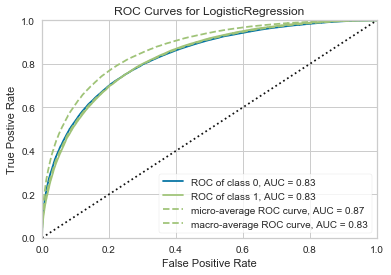

In [20]:
# evaluation
visualizer = ROCAUC(lr_model, classes=["0", "1"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()  

# Submission generation

In [42]:
# Convert bin_3 and bin_4 into integer
test['bin_3'] = test['bin_3'].replace({"T":1, "F":0})
test['bin_4'] = test['bin_4'].replace({"Y":1, "N":0})

# Cyclical encode day and month
test['day_sin'] = np.sin(2*np.pi*(test['day'] / 7))
test['day_cos'] = np.cos(2*np.pi*(test['day'] / 7))

test['month_sin'] = np.sin(2*np.pi*(test['month'] / 12))
test['month_cos'] = np.cos(2*np.pi*(test['month'] / 12))

test = test.merge(nom_5_df, how='left').merge(nom_6_df, how='left').merge(nom_7_df, how='left').merge(nom_8_df, how='left').merge(nom_9_df, how='left')
test = test.fillna(0)

In [43]:
non_0_onehot = pd.DataFrame(nom_0_encoder.transform(test[['nom_0']]).toarray(), 
                            columns=nom_0_encoder.get_feature_names())
non_1_onehot = pd.DataFrame(nom_1_encoder.transform(test[['nom_1']]).toarray(), 
                            columns=nom_1_encoder.get_feature_names())
non_2_onehot = pd.DataFrame(nom_2_encoder.transform(test[['nom_2']]).toarray(), 
                            columns=nom_2_encoder.get_feature_names())
non_3_onehot = pd.DataFrame(nom_3_encoder.transform(test[['nom_3']]).toarray(), 
                            columns=nom_3_encoder.get_feature_names())
non_4_onehot = pd.DataFrame(nom_4_encoder.transform(test[['nom_4']]).toarray(), 
                            columns=nom_4_encoder.get_feature_names())

test = pd.concat([test, non_0_onehot, non_1_onehot, non_2_onehot, non_3_onehot, non_4_onehot], axis=1)

In [44]:
# process ordinal features according to their ranks
test['ord_1'] = test['ord_1'].replace({"Novice":0, 
                                       "Contributor": 1,
                                       "Expert": 2,
                                       "Master": 3,
                                       "Grandmaster": 4})

test['ord_2'] = test['ord_2'].replace({"Freezing":0, 
                                       "Cold": 1,
                                       "Warm": 2,
                                       "Hot": 3,
                                       "Boiling Hot": 4,
                                       "Lava Hot": 5})

test['ord_3'] = ord_3_encoder.transform(test['ord_3'])
test['ord_4'] = ord_4_encoder.transform(test['ord_4'])
test['ord_5'] = ord_5_encoder.transform(test['ord_5'])

In [45]:
ids = test['id']
test = test.drop(['id', 'day', 'month', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis=1)

In [48]:
pd.DataFrame(lr_model.predict_proba(test)).set_index(ids).reset_index()

,id,0,1
0,300000,0.844139,0.155861
1,300001,0.363873,0.636127
2,300002,0.975354,0.024646
3,300003,0.484898,0.515102
4,300004,0.179733,0.820267
...,...,...,...
199995,499995,0.623965,0.376035
199996,499996,0.847708,0.152292
199997,499997,0.562779,0.437221
199998,499998,0.404601,0.595399


In [50]:
submission1 = pd.DataFrame(lr_model.predict_proba(test)).set_index(ids).reset_index().drop(0, axis=1)
submission2 = pd.DataFrame(lr_model.predict_proba(test)).set_index(ids).reset_index().drop(1, axis=1)

submission1.columns = ['id', 'target']
submission2.columns = ['id', 'target']

In [52]:
submission1.to_csv('../submission/submission_prob_1.csv', index=False)
submission2.to_csv('../submission/submission_prob_2.csv', index=False)